In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:

DIRECTORY= r"/content/drive/My Drive/Accident and Damage Detection Identifying and Categorizing Involved Vehicles/dataset/train"
CATAGORIES= ['minor','moderate','severe']


In [3]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

data = []
train_path = DIRECTORY  # No need to append '\train' here

print(train_path)


for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)
    for img in os.listdir(folder):
      img=os.path.join(folder,img)
      img_arr=cv2.imread(img)
      img_arr=cv2.resize(img_arr,(64,64))

      data.append([img_arr,label])






/content/drive/My Drive/Accident and Damage Detection Identifying and Categorizing Involved Vehicles/dataset/train


In [4]:

data


[[array([[[254, 231, 181],
          [254, 231, 181],
          [254, 231, 181],
          ...,
          [161, 145, 142],
          [202, 182, 177],
          [203, 183, 178]],
  
         [[255, 233, 185],
          [255, 233, 185],
          [255, 233, 185],
          ...,
          [203, 188, 186],
          [218, 202, 199],
          [224, 207, 204]],
  
         [[254, 234, 187],
          [255, 235, 188],
          [253, 234, 187],
          ...,
          [230, 216, 214],
          [228, 219, 216],
          [233, 223, 221]],
  
         ...,
  
         [[  3,   7,  12],
          [ 73,  80,  89],
          [ 81,  87,  98],
          ...,
          [  5,   6,   6],
          [  6,   6,   6],
          [  7,   7,   7]],
  
         [[127, 154, 163],
          [129, 154, 170],
          [128, 152, 170],
          ...,
          [  5,   6,   6],
          [  6,   6,   6],
          [  7,   7,   7]],
  
         [[111, 142, 159],
          [109, 137, 162],
          [115, 142, 168

In [5]:
random.shuffle(data)


In [6]:

x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

In [7]:

X= np.array(x)
Y=np.array(y)


In [8]:
x

[array([[[ 47,  46,  32],
         [ 31,  56,  40],
         [ 14,  62,  45],
         ...,
         [  7,  67,  50],
         [ 25,  79,  69],
         [ 20,  64,  55]],
 
        [[ 13,  62,  42],
         [ 17,  37,  23],
         [  2,  65,  46],
         ...,
         [ 21,  88,  72],
         [ 32,  94,  83],
         [ 23,  74,  64]],
 
        [[ 21,  67,  48],
         [ 21,  53,  39],
         [ 15,  71,  55],
         ...,
         [  5,  80,  65],
         [ 28,  95,  83],
         [ 10,  68,  57]],
 
        ...,
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [183, 183, 183],
         ...,
         [101, 101, 101],
         [  2,   2,   2],
         [  1,   1,   1]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  4,   4,   4],
         [  0,   0,   0],
         [  1,   1,   1]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  0,   0,   0],
  

In [9]:
X=X/255


In [10]:

X

array([[[[0.18431373, 0.18039216, 0.1254902 ],
         [0.12156863, 0.21960784, 0.15686275],
         [0.05490196, 0.24313725, 0.17647059],
         ...,
         [0.02745098, 0.2627451 , 0.19607843],
         [0.09803922, 0.30980392, 0.27058824],
         [0.07843137, 0.25098039, 0.21568627]],

        [[0.05098039, 0.24313725, 0.16470588],
         [0.06666667, 0.14509804, 0.09019608],
         [0.00784314, 0.25490196, 0.18039216],
         ...,
         [0.08235294, 0.34509804, 0.28235294],
         [0.1254902 , 0.36862745, 0.3254902 ],
         [0.09019608, 0.29019608, 0.25098039]],

        [[0.08235294, 0.2627451 , 0.18823529],
         [0.08235294, 0.20784314, 0.15294118],
         [0.05882353, 0.27843137, 0.21568627],
         ...,
         [0.01960784, 0.31372549, 0.25490196],
         [0.10980392, 0.37254902, 0.3254902 ],
         [0.03921569, 0.26666667, 0.22352941]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [11]:

X.shape


(2186, 64, 64, 3)

In [12]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation


In [13]:

model=Sequential()
model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())

model.add(Dense(3,activation='softmax'))


In [14]:

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/50
62/62 [==============================] - 11s 161ms/step - loss: 1.0807 - accuracy: 0.4148 - val_loss: 1.0263 - val_accuracy: 0.5068
Epoch 2/50
62/62 [==============================] - 9s 148ms/step - loss: 1.0056 - accuracy: 0.4774 - val_loss: 0.9463 - val_accuracy: 0.5023
Epoch 3/50
62/62 [==============================] - 9s 153ms/step - loss: 0.9594 - accuracy: 0.5191 - val_loss: 1.0532 - val_accuracy: 0.4886
Epoch 4/50
62/62 [==============================] - 8s 134ms/step - loss: 0.9518 - accuracy: 0.5145 - val_loss: 0.9408 - val_accuracy: 0.5434
Epoch 5/50
62/62 [==============================] - 10s 158ms/step - loss: 0.9143 - accuracy: 0.5480 - val_loss: 0.9147 - val_accuracy: 0.5479
Epoch 6/50
62/62 [==============================] - 7s 120ms/step - loss: 0.8870 - accuracy: 0.5714 - val_loss: 0.9456 - val_accuracy: 0.5525
Epoch 7/50
62/62 [==============================] - 9s 147ms/step - loss: 0.8910 - accuracy: 0.5735 - val_loss: 0.9661 - val_accuracy: 0.4795
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


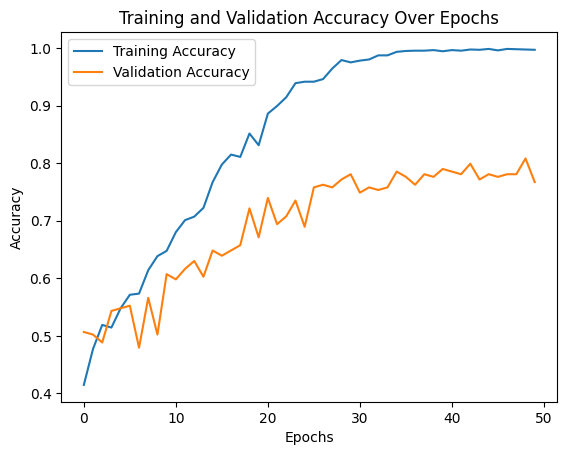

In [15]:

history = model.fit(X,Y,epochs=50,validation_split=0.1)




# Save the entire model
model.save('/content/drive/MyDrive/Accident and Damage Detection Identifying and Categorizing Involved Vehicles/final_model.h5')

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



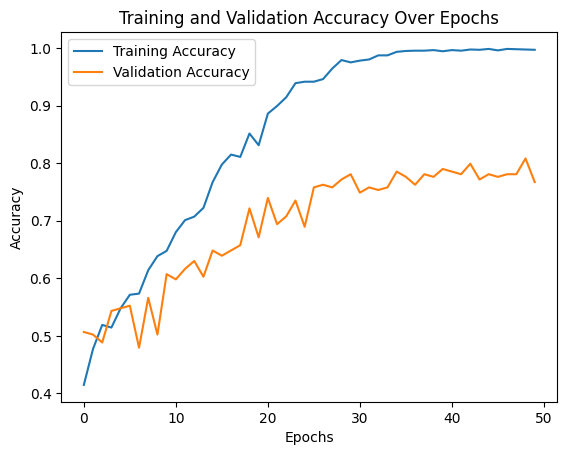

In [16]:


# Save the entire model
model.save('/content/drive/MyDrive/Accident and Damage Detection Identifying and Categorizing Involved Vehicles/final_model.h5')

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 20, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 32)          0

In [19]:

from keras.preprocessing import image
import numpy as np

img_pred=image.load_img(r"/content/drive/MyDrive/Accident and Damage Detection Identifying and Categorizing Involved Vehicles/dataset/train/minor/(100).JPEG",target_size=(64,64))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


results= model.predict(img_pred)

predicted_class_index = np.argmax(results)

# Map the index to the corresponding class name
predicted_class_name = CATAGORIES[predicted_class_index]
print(results)
# Print the results
print(f"The predicted class is: {predicted_class_name}")
print(f"The confidence scores for each class are: {results}")



1/1 [==============================] - 0s 110ms/step
[[1. 0. 0.]]
The predicted class is: minor
The confidence scores for each class are: [[1. 0. 0.]]


1/1 [==============================] - 0s 21ms/step
The predicted class is: minor
The confidence scores for each class are: [[9.9716872e-01 6.1204973e-06 2.8252141e-03]]


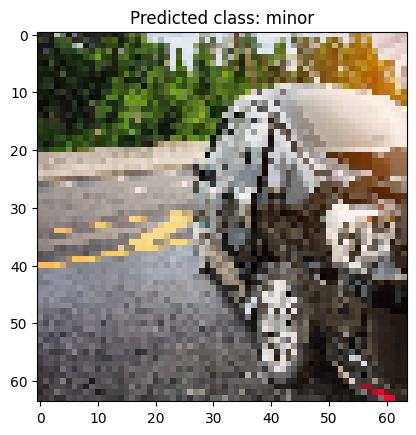

In [20]:
img_path = "/content/drive/MyDrive/Accident and Damage Detection Identifying and Categorizing Involved Vehicles/img_accident3.jpeg"
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

results = model.predict(img_array)
predicted_class_index = np.argmax(results)
predicted_class_name = CATAGORIES[predicted_class_index]

# Print the results
print(f"The predicted class is: {predicted_class_name}")
print(f"The confidence scores for each class are: {results}")

# Plot the image
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()

1/1 [==============================] - 0s 22ms/step
The predicted class is: minor
The confidence scores for each class are: [[9.9988854e-01 8.6081825e-05 2.5402122e-05]]


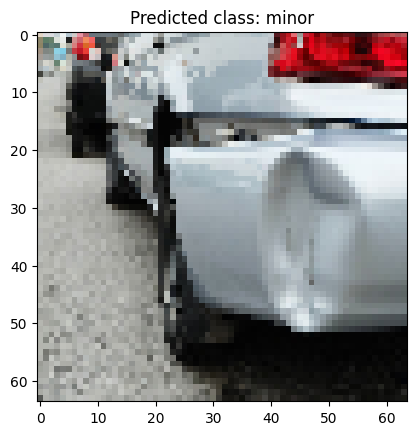

In [21]:





img_path = "/content/drive/MyDrive/Accident and Damage Detection Identifying and Categorizing Involved Vehicles/img_accident_minor.jpg"
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

results = model.predict(img_array)
predicted_class_index = np.argmax(results)
predicted_class_name = CATAGORIES[predicted_class_index]

# Print the results
print(f"The predicted class is: {predicted_class_name}")
print(f"The confidence scores for each class are: {results}")

# Plot the image
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()









1/1 [==============================] - 0s 33ms/step
The predicted class is: moderate
The confidence scores for each class are: [[2.1612436e-04 8.1602812e-01 1.8375577e-01]]


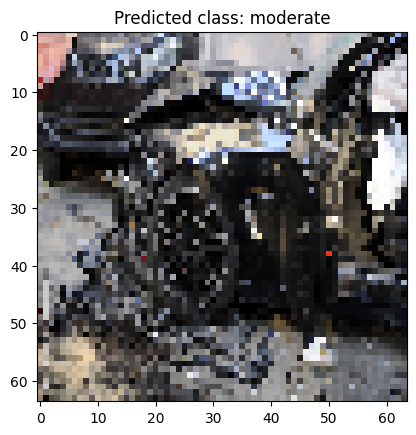

In [22]:
img_path = "/content/drive/MyDrive/Accident and Damage Detection Identifying and Categorizing Involved Vehicles/img_accident.jpg"
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

results = model.predict(img_array)
predicted_class_index = np.argmax(results)
predicted_class_name = CATAGORIES[predicted_class_index]

# Print the results
print(f"The predicted class is: {predicted_class_name}")
print(f"The confidence scores for each class are: {results}")

# Plot the image
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()



In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [24]:
!pip install scikit-learn

In [25]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score  # Add f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint


y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# If Y_val is already one-hot encoded, convert it to class indices
if len(Y_val.shape) > 1:
    Y_val_classes = np.argmax(Y_val, axis=1)
else:
    Y_val_classes = Y_val  # Y_val is not one-hot encoded

precision = precision_score(Y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(Y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(Y_val_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

7/7 [==============================] - 0s 54ms/step
Precision: 0.9784963364128703
Recall: 0.9771689497716894
F1 Score: 0.9772710916105185
